## EDA & Feature Enginnering 
## Cleaning , preparing data for model Training

In [163]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

### we have Ecommerce Data people who have bought some kind of product based on tht we need to predict what is purchase capacity 

In [164]:
df_train = pd.read_csv("E:\\EDA_FE\\dataset\\train.csv")

In [137]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [138]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [139]:
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [165]:
# import test data 

df_test = pd.read_csv("E:\\EDA_FE\\dataset\\test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [166]:
# merge both data 

df = pd.concat([df_train, df_test], ignore_index=True)

In [142]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [19]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.100136e+06,1.100136e+06,1.100136e+06,1.100136e+06,752860.000000,333642.000000,1.100136e+06
mean,1.003029e+06,8.076707e+00,4.096530e-01,5.404270e+00,9.842329,12.668243,9.263969e+03
std,1.727591e+03,6.522658e+00,4.917699e-01,3.936210e+00,5.086586,4.125331,5.023063e+03
min,1.000001e+06,0.000000e+00,0.000000e+00,1.000000e+00,2.000000,3.000000,1.200000e+01
25%,1.001516e+06,2.000000e+00,0.000000e+00,1.000000e+00,5.000000,9.000000,5.823000e+03
50%,1.003077e+06,7.000000e+00,0.000000e+00,5.000000e+00,9.000000,14.000000,8.047000e+03
75%,1.004478e+06,1.400000e+01,1.000000e+00,8.000000e+00,15.000000,16.000000,1.205400e+04
max,1.006040e+06,2.000000e+01,1.000000e+00,2.000000e+01,18.000000,18.000000,2.396100e+04


#### User_ID is not usefull col then drop i t


In [167]:
df.drop("User_ID"  , axis=1 , inplace=True)

In [144]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [145]:
set(df.Gender)

{'F', 'M'}

In [168]:
pd.get_dummies(df["Gender"])

,F,M
0,True,False
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
783662,True,False
783663,True,False
783664,True,False
783665,True,False


In [169]:
pd.get_dummies(df["Gender"]).astype(int) 


,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
783662,1,0
783663,1,0
783664,1,0
783665,1,0


In [170]:
df["Gender"] = pd.get_dummies(df["Gender"]) 


ValueError: Columns must be same length as key

In [171]:
# df["Gender"] = df["Gender"].map({'F':0 , 'M':1})  

from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])


In [150]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [161]:
set(df.Gender)

{0, 1}

In [162]:
df.Age

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
783662   NaN
783663   NaN
783664   NaN
783665   NaN
783666   NaN
Name: Age, Length: 783667, dtype: float64

In [172]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [173]:
set(df.Age)

{'0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'}

In [174]:
age_mapping = {
    '0-17': 1,
    '18-25': 2,
    '26-35': 3,
    '36-45': 4,
    '46-50': 5,
    '51-55': 6,
    '55+': 7
}



In [175]:
df['Age'] = df['Age'].map(age_mapping)


In [176]:
set(df.Age)

{1, 2, 3, 4, 5, 6, 7}

In [157]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [177]:
df_city = pd.get_dummies(df["City_Category"] , drop_first=True).astype(int)

In [64]:
df_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
783662,1,0
783663,1,0
783664,1,0
783665,0,1


In [178]:
df = pd.concat([df , df_city]  , axis=1)  
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [179]:
# drp city_categor we dont need it now  

df.drop("City_Category"  , axis=1 , inplace=True)

In [180]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


## missing val 

In [181]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int32  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(4), object(2)
memory usage: 62.8+ MB


In [182]:
df['Product_Category_2'].unique()   # if we have nan val wha is best way to replace it 

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [ ]:
# in discre multi category val we have it should be replace with 

In [183]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [184]:
# best way to missing by Mode  

df['Product_Category_2'].mode()[0]

8.0

In [185]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [186]:
df['Product_Category_2'].isnull().sum()

0

In [ ]:
# 'Product_Category_3'  replace misssing 

In [187]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [188]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [189]:
df['Product_Category_3'].mode()[0]

16.0

In [190]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [191]:
df['Product_Category_2'].isnull().sum()

0

In [197]:
df['Purchase'] = df['Purchase'].fillna(df['Purchase'].mode()[0])

In [198]:
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
B                             0
C                             0
dtype: int64

In [199]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [200]:
set(df.	Stay_In_Current_City_Years)

{'0', '1', '2', '3', '4'}

In [201]:
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].str.replace("+" ,"")

In [202]:
set(df.	Stay_In_Current_City_Years)

{'0', '1', '2', '3', '4'}

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int32  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(4), object(2)
memory usage: 62.8+ MB


In [203]:
# Stay_In_Current_City_Years  783667 non-null  --> object    

# convert object into integer 


df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].astype("Int64")
 

In [204]:
df["Gender"]=df["Gender"].astype("Int64")
df["B"]=df["B"].astype("Int64") 
df["C"]=df["C"].astype("Int64")


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  Int64  
 2   Age                         783667 non-null  object 
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  Int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  Int64  
 11  C                           783667 non-null  Int64  
dtypes: Int64(4), float64(3), int64(3), object(2)
memory usage: 74.7+ MB


In [205]:
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
B                             0
C                             0
dtype: int64

In [206]:
df.drop('Product_ID' , axis=1 , inplace=True)

In [207]:
df

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
783662,0,3,15,4,1,8,8.0,16.0,7011.0,1,0
783663,0,3,15,4,1,5,8.0,16.0,7011.0,1,0
783664,0,3,15,4,1,1,5.0,12.0,7011.0,1,0
783665,0,5,1,4,0,10,16.0,16.0,7011.0,0,1


## visuslliazation 

AttributeError: 'int' object has no attribute 'startswith'

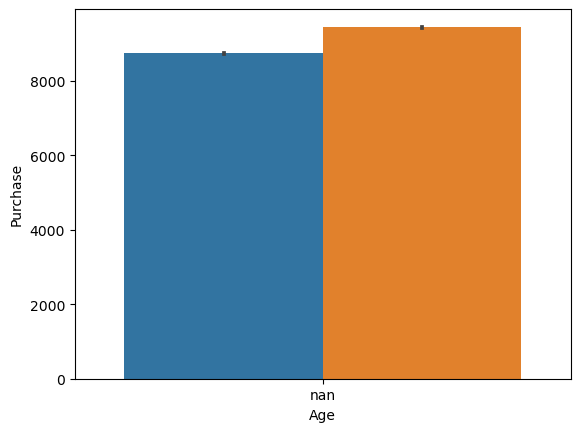

In [114]:


# Assuming df contains the relevant data
sns.barplot(x="Age", y="Purchase", hue="Gender", data=df)

# Show the plot
plt.show()


## purchase of men is higher thaan women 

In [110]:
# Purchase with Occupation 

AttributeError: 'int' object has no attribute 'startswith'

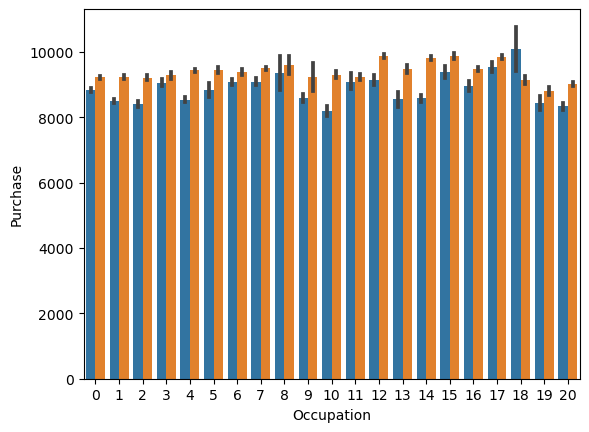

In [115]:
sns.barplot(x="Occupation", y="Purchase", hue="Gender", data=df)

# Show the plot
plt.show()

AttributeError: 'int' object has no attribute 'startswith'

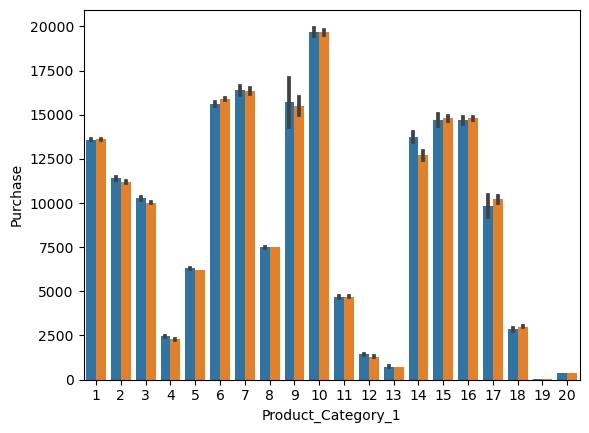

In [116]:
sns.barplot(x="Product_Category_1", y="Purchase", hue="Gender", data=df)

# Show the plot
plt.show()

AttributeError: 'int' object has no attribute 'startswith'

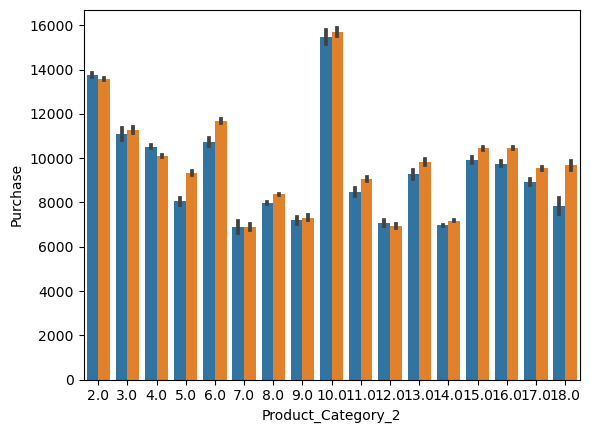

In [117]:
sns.barplot(x="Product_Category_2", y="Purchase", hue="Gender", data=df)

# Show the plot
plt.show()

AttributeError: 'int' object has no attribute 'startswith'

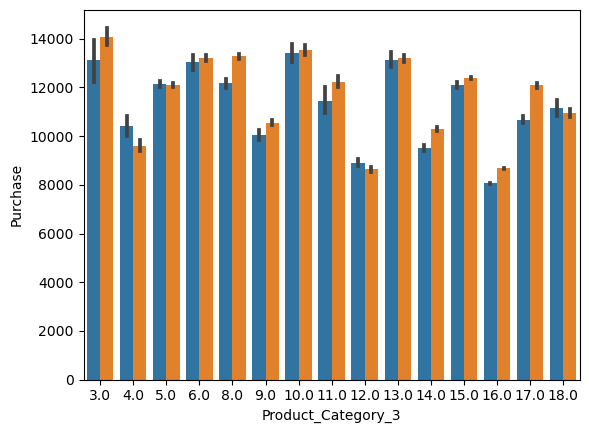

In [118]:
sns.barplot(x="Product_Category_3", y="Purchase", hue="Gender", data=df)

# Show the plot
plt.show()

## Feature Scaling

In [208]:
df_test =df[df['Purchase'].isnull()]

In [209]:
df_train = df[~df['Purchase'].isnull()]

In [217]:
from sklearn.model_selection import train_test_split

X = df.drop('Purchase', axis=1)  
y =  df['Purchase'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set shapes:", X_train.shape, y_train.shape)
print("Testing set shapes:", X_test.shape, y_test.shape)


Training set shapes: (626933, 10) (626933,)
Testing set shapes: (156734, 10) (156734,)


In [211]:
# Feature Scaling 

In [218]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler() 

X_train=sc.fit_transform(X_train) 

X_test=sc.fit_transform(X_test)

In [219]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
avg_mse_cv = -cross_val_scores.mean()
print("Cross-Validation Mean Squared Error:", avg_mse_cv)


Mean Squared Error: 17070408.566808302
Cross-Validation Mean Squared Error: 17155828.760207158
